In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv("wikipedia_512_pretraining.csv")
df.head(10)

In [ ]:
df.describe()

,text
count,6699666
unique,6685332
top,Source:
freq,77


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.describe()

,text
count,6685332
unique,6685332
top,Herr's Potato Chips 200 The Herr's Potato Chi...
freq,1


In [ ]:
# df = df.iloc[970000:]
# df.describe()

In [ ]:
new_data = []

# Iterate over the 'text' column and extract lines
for index, text in enumerate(df['text']):
    if isinstance(text, str):
        text = text.replace('\n', ' ')
        text = text.replace('\t', ' ')
        lines = text.split('.')
        for line in lines:
            new_data.append({'index': index, 'v2': line.strip()})
    else:
        new_data.append({'index': index, 'v2': ''})

# Create a new DataFrame from the extracted lines
df_v2 = pd.DataFrame(new_data).set_index('index')

In [ ]:
# df = df.iloc[971310:]
df_v2 = df_v2.drop_duplicates()
# df_v2.iloc[1000000:]
df_v2.describe()


,v2
count,73763903
unique,73763903
top,Herr's Potato Chips 200 The Herr's Potato Chi...
freq,1


In [ ]:

df.describe()

,text
count,6685332
unique,6685332
top,Herr's Potato Chips 200 The Herr's Potato Chi...
freq,1


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import tqdm
import random
import string
import re

def create_mixed_substitution_dict(seed=42):
    # Combine all required characters
    chars = string.punctuation + string.digits + string.ascii_letters
    chars = list(chars)

    # Generate pairs of characters
    pairs = [a + b for a in chars for b in chars]

    # Use only pairs in the key
    key_combined = pairs.copy()

    # Set seed and shuffle the key for consistent results
    random.seed(seed)
    random.shuffle(key_combined)

    # Ensure no character or pair maps to itself
    valid_mapping = False
    while not valid_mapping:
        substitution_dict = {original: substitute for original, substitute in zip(chars + pairs, key_combined)}
        valid_mapping = all(original != substitute for original, substitute in substitution_dict.items())
        if not valid_mapping:
            random.shuffle(key_combined)

    return substitution_dict

def mixed_sub_encrypt(plain_text, substitution_dict):
    cipher_text = ""
    i = 0
    while i < len(plain_text):
        # Attempt to find a pair first
        if i + 1 < len(plain_text):
            pair = plain_text[i:i + 2]
            if pair in substitution_dict:
                cipher_text += substitution_dict[pair]
                i += 2
                continue

        # If no valid pair, fallback to single character
        char = plain_text[i]
        cipher_text += substitution_dict.get(char, char)
        i += 1

    return cipher_text


def mixed_sub_decrypt(cipher_text, substitution_dict):
    reverse_substitution_dict = {substitute: original for original, substitute in substitution_dict.items()}
    plain_text = ""
    i = 0
    while i < len(cipher_text):
        # Attempt to find a pair first
        if i + 1 < len(cipher_text):
            pair = cipher_text[i:i + 2]
            if pair in reverse_substitution_dict:
                plain_text += reverse_substitution_dict[pair]
                i += 2
                continue

        # If no valid pair, fallback to single character
        char = cipher_text[i]
        plain_text += reverse_substitution_dict.get(char, char)
        i += 1

    return plain_text


import string

def clean_sentence(sentence):
    # Handle potential float values
    if isinstance(sentence, float):
        sentence = str(sentence)  # Convert float to string if necessary

    # Replace commas and opening brackets with spaces to treat them as word separators
    sentence = sentence.replace(',', ' ')
    sentence = sentence.replace('(', ' ')
    sentence = sentence.replace('{', ' ')
    sentence = sentence.replace('[', ' ')
    sentence = sentence.replace('–', ' ')
    sentence = sentence.replace('—', ' ')
    sentence = sentence.replace('\n', ' ')
    sentence = sentence.replace('\t', ' ')
    sentence = sentence.replace('“', ' ')
    sentence = sentence.replace('”', ' ')
    sentence = sentence.replace('‘', ' ')
    sentence = sentence.replace('’', ' ')

    # Remove punctuation from the end of words after handling periods
    words = sentence.split()
    cleaned_words = []
    for word in words:
        if '.' in word:
            word = word.split('.')[0]  # Keep only the part before the first full stop
        cleaned_words.append(word)

    # Join the cleaned words and remove any remaining punctuation
    cleaned_sentence = ' '.join(cleaned_words)
    cleaned_sentence = cleaned_sentence.translate(str.maketrans('', '', string.punctuation))
    # Use regex to remove all non-alphanumeric characters except spaces
    cleaned_sentence = re.sub(r'[^a-zA-Z0-9\s]', '', cleaned_sentence)
    # Convert to lowercase
    cleaned_sentence = cleaned_sentence.lower()

    return cleaned_sentence



# Encrypt text using mixed substitution
substitution_dict = create_mixed_substitution_dict(seed=42)
# path_to_file = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')


# with open('/content/wiki_sentences.txt','r') as f:
# with open(path_to_file) as f:
# #     Read the lines and lowercase each line
#     lines = [line for line in f.read().splitlines()]
"""
count = 0
from tqdm import tqdm

lines = []
for line in tqdm(df_v2['v2'], desc="Processing lines", unit="line"):
    # Read the lines and lowercase each line
    en = mixed_sub_encrypt(clean_sentence(line), substitution_dict)
    cleaned_line = en.strip().split()
    lines.append(cleaned_line)

"""

# Print the first few lines to verify they are lowercase
# for i in range(10):
#     print(lines[i])
#     print(mixed_sub_encrypt(clean_sentence(lines[i]), substitution_dict))
# print()

# Encrypt the lines
# encrypted_lines = [mixed_sub_encrypt(clean_sentence(line), substitution_dict) for line in lines if clean_sentence(line).strip()]
# encrypted_lines = [clean_sentence(line) for line in lines if clean_sentence(line).strip()]
# print(encrypted_lines)

# Create a dataset from the encrypted lines
# text_ds = tf.data.Dataset.from_tensor_slices(encrypted_lines).filter(lambda x: tf.cast(tf.strings.length(x), bool))


# def custom_standardization(input_data):
#     return tf.strings.regex_replace(input_data, r"\s+", " ")

# vocab_size =  77824
# sequence_length = 10

# vectorize_layer = layers.TextVectorization(
#     max_tokens=vocab_size,
#     output_mode='int',
#     output_sequence_length=sequence_length,
#     standardize=custom_standardization)



# vectorize_layer.adapt(text_ds.batch(1024))

# # Save the created vocabulary for reference.
# inverse_vocab = vectorize_layer.get_vocabulary()

# print(inverse_vocab[:20])

# # Vectorize the data in text_ds.
# text_vector_ds = text_ds.batch(1024).prefetch(tf.data.AUTOTUNE).map(vectorize_layer).unbatch()

# sequences = list(text_vector_ds.as_numpy_iterator())
# print(len(sequences))
# print()

# # """Inspect a few examples from `sequences`:"""
# for seq in sequences[:5]:
#     print(f"{seq} => {[inverse_vocab[i] for i in seq]}")

# print(len(inverse_vocab))

'\ncount = 0\nfrom tqdm import tqdm\n\nlines = []\nfor line in tqdm(df_v2[\'v2\'], desc="Processing lines", unit="line"):\n    # Read the lines and lowercase each line\n    en = mixed_sub_encrypt(clean_sentence(line), substitution_dict)\n    cleaned_line = en.strip().split()\n    lines.append(cleaned_line)\n\n'

In [ ]:
print(lines[:5])

[['2Kp10L', 'pX6.#r', '%a>e0L', '{%!n', 'Q+EZ', '2Kp10L', 'pX6.#r', '%a>e0L', '{%!n', 'cHzj%&z-n_', 'Mm', 'b)^;Tlz-n_', "~i'X", '~i.T', '{T', 'IE', 'BQ~i', 'fG:F6M0L', '?n:Azj', ']j}@', 'TlO,', 'T0', '#rhUdI', 'Z&#BgyPU'], ['C3;].T', '{%{%', 'Q+EZ', 'TlO,', '+U0L', 'YT="', 'n]', 'Q+EZ', 'BQ~i', 'fG:F6M0L', '?n:Azj', 'q$2KRZhU', ";]'X", '^;~i^;0L', 'C3;].T', 'C33evT', 'R5J_n_', '#r', 'Q+EZ', ']j}@', '?n:Azj', 'q$2KRZhU', "bzz-'X", 'Q+EZ', 'EOw+DjT0zhA"', 'n]', ':Fq$BQ0L', ']j}@', 'IEn_', 'K@}@', '?n:Azj', '0EQ+', 'Q+EZ', 'BQ~i', 'fG:F6M0L', '?n:Azj'], ['^HIE`~', '11N=Ty', 'Ni0L', 'yXA"', 'Q+EZ', 'TlO,', '7E', 'V)fG0L', 'Q+EZ', 'R5}@', 'n]', 'IE[f', 'g1$WZW'], [], ['r}', '?n@-$C', 'J_&9zhA"', ';]]}mH0L', 'Q+EZ', "=g:AfGz-'X", 'n]', 'Q+EZ', 'Tl3eSV]}', '~i/lOw%&]O', 'BQ]j', '17ug', 'uBau3evT', '.D[wLM', 'Q+EZ', 's<>R', '+U]}', 'n]', 'Q+EZ', '5ghUr^', 'n}]}`Q', ".T?nc4u|'X"]]


In [ ]:
print(clean_sentence("oana spent the next several seasons.à as an outfielder ·綾瀬 r the seals〉• ‘ `— 1929 – 1932"))

oana spent the next several seasons as an outfielder  r the seals  1929 1932


In [ ]:
# SEED = 42
# AUTOTUNE = tf.data.AUTOTUNE

In [ ]:
!pip install gensim

In [ ]:
# ADD THIS SECTION

from gensim.models import Word2Vec

# from tqdm import tqdm

word2vec_model = Word2Vec(
    sentences=lines,  # Use the tokenized sentences instead of raw lines
    vector_size=256,  # Embedding dimension
    window=4,  # Context window size
    min_count=15,  # Minimum frequency for a word to be included in the vocab
    sg=1,  # CBOW model (sg=1 for skip-gram)
    workers=4,  # Number of threads to train the model
    epochs=5,  # Number of epochs
    seed=42
)



# Save the FastText model
word2vec_model.save("word2vec_model.bin")


In [ ]:
from gensim.models import Word2Vec

word2vec_model = 'word2vec_model.bin'

In [ ]:
import numpy as np
import pandas as pd
from gensim.models import Word2Vec


# Load the Word2Vec model
word2vec_model = Word2Vec.load('word2vec_model.bin')
# word2vec_model = Word2Vec.load('/content/drive/MyDrive/Thesis [G-suite]/Defense/Embedding Models/Word2Vec_SkipGram_New/word2vec_model.bin')



In [ ]:
import numpy as np

# # Load the Word2Vec model
# word2vec_model = Word2Vec.load('word2vec_model_3.bin')

# Extract the word vectors
word_vectors = word2vec_model.wv

# Function to calculate cosine similarity
def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

# Get vectors for "king", "man", "woman", and "queen"
# '11p6', '`E#BA"', 'UkA"', 'yXUkA"'
king_vector = word_vectors['11p6']
man_vector = word_vectors['UkA"']
woman_vector = word_vectors['yXUkA"']
queen_vector = word_vectors['`E#BA"']

# Calculate the analogy result: "king - man + woman"
analogy_result = king_vector - man_vector + woman_vector

# Calculate cosine similarity between "king" and "queen"
similarity_king_queen = cosine_similarity(king_vector, queen_vector)

# Calculate cosine similarity between analogy result and "queen"
similarity_analogy_queen = cosine_similarity(analogy_result, queen_vector)

# Print the results
print(f"Cosine similarity between 'king' and 'queen': {similarity_king_queen:.4f}")
print(f"Cosine similarity between the analogy result and 'queen': {similarity_analogy_queen:.4f}")

Cosine similarity between 'king' and 'queen': 0.6782
Cosine similarity between the analogy result and 'queen': 0.7264


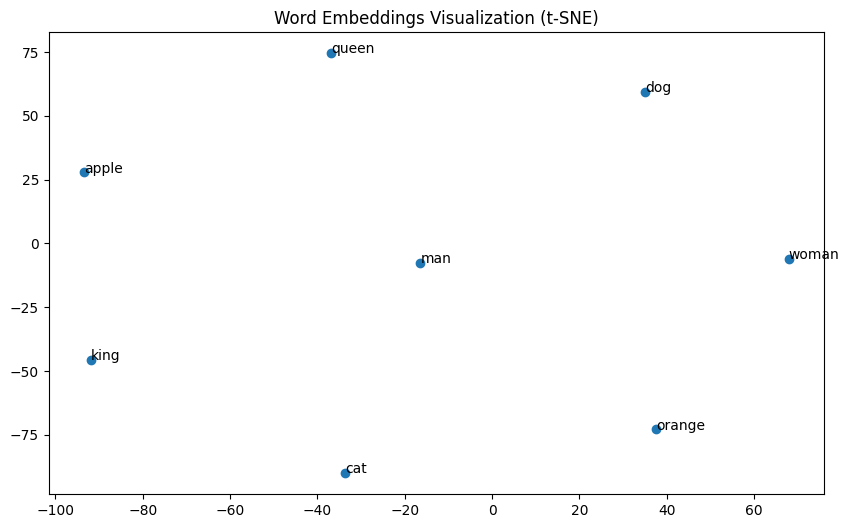

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity

def plot_word_embeddings(model, words_to_plot=None, n_components=2):
    if words_to_plot is None:
        words_to_plot = [word for word in model.wv.index_to_key[:100]]

    # Extract word vectors
    word_vectors = np.array([model.wv[mixed_sub_encrypt(word, substitution_dict)] for word in words_to_plot])

    # Perform t-SNE dimensionality reduction
    # Set perplexity to a value less than the number of samples (len(words_to_plot))
    tsne = TSNE(n_components=n_components, random_state=42, perplexity=min(len(words_to_plot) - 1, 30))
    embeddings_2d = tsne.fit_transform(word_vectors)

    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])

    # Add word labels to points
    for i, word in enumerate(words_to_plot):
        plt.annotate(word, xy=(embeddings_2d[i, 0], embeddings_2d[i, 1]))

    plt.title("Word Embeddings Visualization (t-SNE)")
    plt.show()

# ... (rest of your code remains the same)

def plot_similarity_heatmap(model, words):
    """
    Plot similarity heatmap for selected words
    """
    # Calculate similarity matrix
    vectors = [model.wv[mixed_sub_encrypt(word, substitution_dict)] for word in words]
    similarity_matrix = cosine_similarity(vectors)

    wordsy = [f"{(mixed_sub_encrypt(word, substitution_dict))}\n{word}" for word in words]
    wordsx = [f"{word}\n{(mixed_sub_encrypt(word, substitution_dict))}" for word in words]
    # Create heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm',
                xticklabels=wordsx, yticklabels=wordsy)
    plt.title("Word Similarity Heatmap")
    plt.show()

def evaluate_analogy(model, word1, word2, word3, top_n=5):
    """
    Evaluate and visualize word analogies with cosine similarity rates

    Args:
        model: Word2Vec model
        word1, word2, word3: Words for the analogy (word2 - word1 + word3 = ?)
        top_n: Number of top results to show
    """
    # Encrypt words
    encrypted_word1 = mixed_sub_encrypt(word1, substitution_dict)
    encrypted_word2 = mixed_sub_encrypt(word2, substitution_dict)
    encrypted_word3 = mixed_sub_encrypt(word3, substitution_dict)

    try:
        # Get analogy results
        results = model.wv.most_similar(
            positive=[encrypted_word2, encrypted_word3],
            negative=[encrypted_word1],
            topn=top_n
        )

        # Prepare data for visualization
        words = [f"{mixed_sub_decrypt(r[0], substitution_dict)}\n{r[0]}" for r in results]
        scores = [r[1] for r in results]

        # Create visualization
        plt.figure(figsize=(8, 5))
        bars = plt.barh(words, scores, color = plt.cm.viridis(scores))

        # Add cosine similarity rates on top of each bar
        for i, bar in enumerate(bars):
            width = bar.get_width()
            plt.text(width, bar.get_y() + bar.get_height()/2,
                    f'{scores[i]:.2f}',
                    ha='left', va='center', fontweight='bold')

        # Decrypt words for title
        decrypted_word1 = mixed_sub_decrypt(encrypted_word1, substitution_dict)
        decrypted_word2 = mixed_sub_decrypt(encrypted_word2, substitution_dict)
        decrypted_word3 = mixed_sub_decrypt(encrypted_word3, substitution_dict)

        plt.title(f"Top {top_n} words for analogy:\n{decrypted_word2} - {decrypted_word1} + {decrypted_word3} = ?",
                  fontsize=12, pad=10)
        plt.xlabel("Cosine Similarity")

        # Adjust layout and display
        plt.tight_layout()
        plt.show()

        # Print numerical results
        print("\nNumerical Results:")
        for word, score in zip(words, scores):
            print(f"{word}: {score:.3f}")

    except KeyError as e:
        print(f"Error: One of the words is not in the vocabulary - {e}")

if __name__ == "__main__":
    # Assuming word2vec_model is already loaded

    # 1. Visualize word embeddings
    # common_words = ['UkA"', 'yXUkA"', '11p6', '`E#BA"', 'dIvT', '~i]O', '|NzPEZ', 'lyIEH1']
    common_words = ['man', 'woman', 'king', 'queen', 'dog', 'cat', 'apple', 'orange']
    plot_word_embeddings(word2vec_model, common_words)

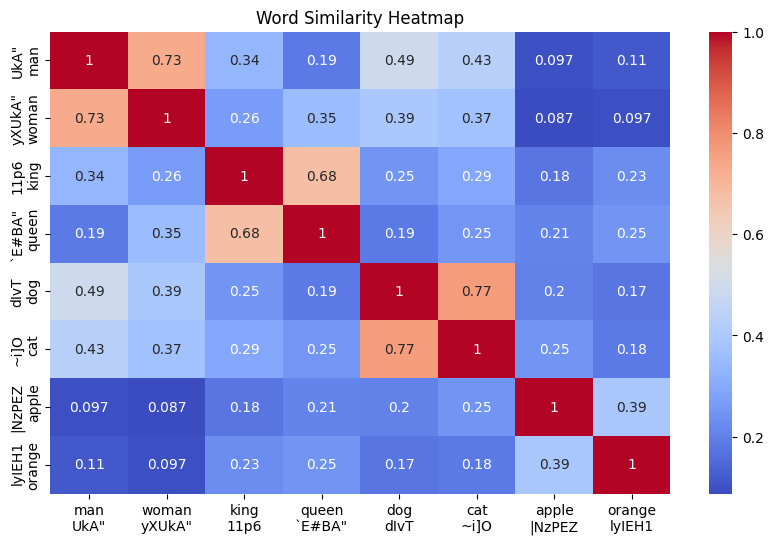

In [ ]:
if __name__ == "__main__":
    plot_similarity_heatmap(word2vec_model, common_words)

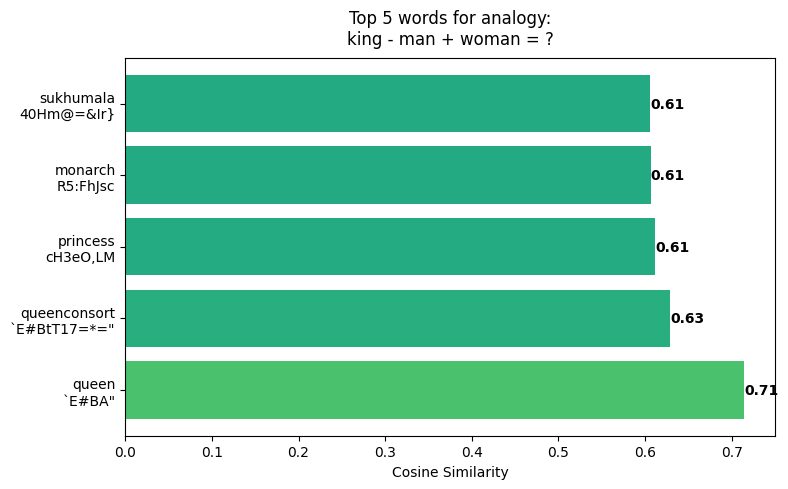


Numerical Results:
queen
`E#BA": 0.715
queenconsort
`E#BtT17=*=": 0.629
princess
cH3eO,LM: 0.612
monarch
R5:FhJsc: 0.606
sukhumala
40Hm@=&Ir}: 0.606


In [ ]:
if __name__ == "__main__":


    # 3. Evaluate analogy
    evaluate_analogy(word2vec_model, 'man', 'king', 'woman')

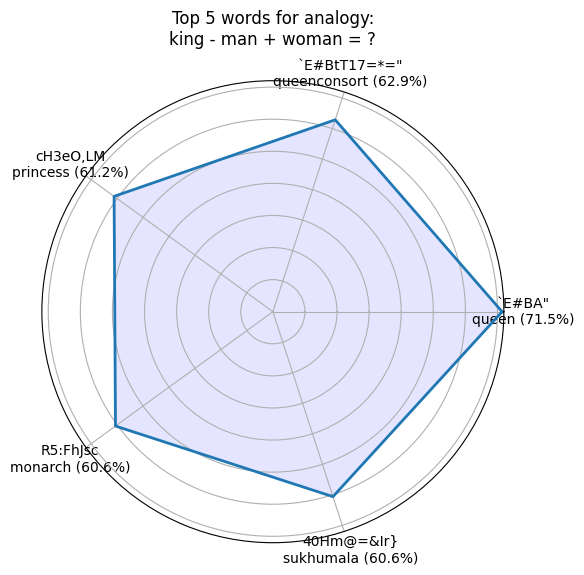


Numerical Results:
`E#BA"
queen (71.5%): 0.715
`E#BtT17=*="
queenconsort (62.9%): 0.629
cH3eO,LM
princess (61.2%): 0.612
R5:FhJsc
monarch (60.6%): 0.606
40Hm@=&Ir}
sukhumala (60.6%): 0.606


In [ ]:
import matplotlib.pyplot as plt
from math import pi

def evaluate_analogy(model, word1, word2, word3, top_n=5, plot_type='bar'):
    """
    Evaluate and visualize word analogies with cosine similarity rates

    Args:
        model: Word2Vec model
        word1, word2, word3: Words for the analogy (word2 - word1 + word3 = ?)
        top_n: Number of top results to show
        plot_type: Type of plot to visualize the results ('bar', 'line', 'radar', 'scatter', 'pie')
    """
    # Encrypt words
    encrypted_word1 = mixed_sub_encrypt(word1, substitution_dict)
    encrypted_word2 = mixed_sub_encrypt(word2, substitution_dict)
    encrypted_word3 = mixed_sub_encrypt(word3, substitution_dict)

    try:
        # Get analogy results
        results = model.wv.most_similar(
            positive=[encrypted_word2, encrypted_word3],
            negative=[encrypted_word1],
            topn=top_n
        )

        # Prepare data for visualization
        words = [f"{r[0]}\n{mixed_sub_decrypt(r[0], substitution_dict)} ({r[1]*100:.1f}%)" for r in results]  # Add percentage to words
        scores = [r[1] for r in results]

        # Decrypt words for title
        decrypted_word1 = mixed_sub_decrypt(encrypted_word1, substitution_dict)
        decrypted_word2 = mixed_sub_decrypt(encrypted_word2, substitution_dict)
        decrypted_word3 = mixed_sub_decrypt(encrypted_word3, substitution_dict)

        title = f"Top {top_n} words for analogy:\n{decrypted_word2} - {decrypted_word1} + {decrypted_word3} = ?"

        # Visualization types
        if plot_type == 'bar':
            plot_colored_bar_chart(words, scores, title)
        elif plot_type == 'line':
            plot_line_chart(words, scores, title)
        elif plot_type == 'radar':
            plot_radar_chart(words, scores, title)
        elif plot_type == 'scatter':
            plot_scatter_chart(words, scores, title)
        elif plot_type == 'pie':
            plot_pie_chart(words, scores, title)
        else:
            print(f"Error: Unknown plot_type '{plot_type}'")

        # Print numerical results
        print("\nNumerical Results:")
        for word, score in zip(words, scores):
            print(f"{word}: {score:.3f}")

    except KeyError as e:
        print(f"Error: One of the words is not in the vocabulary - {e}")


# Define the various plot functions here:

def plot_line_chart(words, scores, title):
    plt.figure(figsize=(8, 5))
    plt.plot(words, scores, marker='o', color='b')
    plt.title(title, fontsize=12)
    plt.ylabel('Cosine Similarity')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_radar_chart(words, scores, title):
    N = len(words)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    scores += scores[:1]

    ax.plot(angles, scores, linewidth=2, linestyle='solid')
    ax.fill(angles, scores, 'b', alpha=0.1)

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(words)

    plt.title(title, fontsize=12, pad=10)
    plt.show()

def plot_scatter_chart(words, scores, title):
    plt.figure(figsize=(8, 5))
    plt.scatter(words, scores, color='r', s=100)
    plt.title(title, fontsize=12)
    plt.ylabel('Cosine Similarity')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_colored_bar_chart(words, scores, title):
    plt.figure(figsize=(8, 5))
    colors = plt.cm.viridis(scores)
    bars = plt.barh(words, scores, color=colors)

    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2,
                 f'{scores[i]:.2f}',
                 ha='left', va='center', fontweight='bold')

    plt.title(title, fontsize=12, pad=10)
    plt.xlabel('Cosine Similarity')
    plt.tight_layout()
    plt.show()

def plot_pie_chart(words, scores, title):
    plt.figure(figsize=(8, 5))
    plt.pie(scores, labels=words, autopct='%1.1f%%', startangle=140)
    plt.title(title, fontsize=12)
    plt.tight_layout()
    plt.show()


# Example usage with plot types:
evaluate_analogy(word2vec_model, 'man', 'king', 'woman', plot_type='radar')
# evaluate_analogy(word2vec_model, 'man', 'king', 'woman', plot_type='line')
# evaluate_analogy(word2vec_model, 'man', 'king', 'woman', plot_type='scatter')
# evaluate_analogy(word2vec_model, 'man', 'king', 'woman', plot_type='pie')
# evaluate_analogy(word2vec_model, 'man', 'king', 'woman', plot_type='bar')


In [ ]:
# prompt: sub_encrypt the words in common_words list and print
common_words = ['man', 'woman', 'king', 'queen', 'dog', 'cat', 'apple', 'orange']
encrypted_common_words = [f"{(mixed_sub_encrypt(word, substitution_dict))}\n {word}" for word in common_words]
print(encrypted_common_words)


['UkA"\n man', 'yXUkA"\n woman', '11p6\n king', '`E#BA"\n queen', 'dIvT\n dog', '~i]O\n cat', '|NzPEZ\n apple', 'lyIEH1\n orange']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import random

random.seed(42)
np.random.seed(42)

vocab = list(word2vec_model.wv.index_to_key)

word_sample = random.sample(vocab, 300)  # For example, visualize 300 words
word_vectors = [word2vec_model.wv[word] for word in word_sample]

In [ ]:
# Reduce to 2 dimensions using PCA (or t-SNE for better visualization of complex relationships)
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)


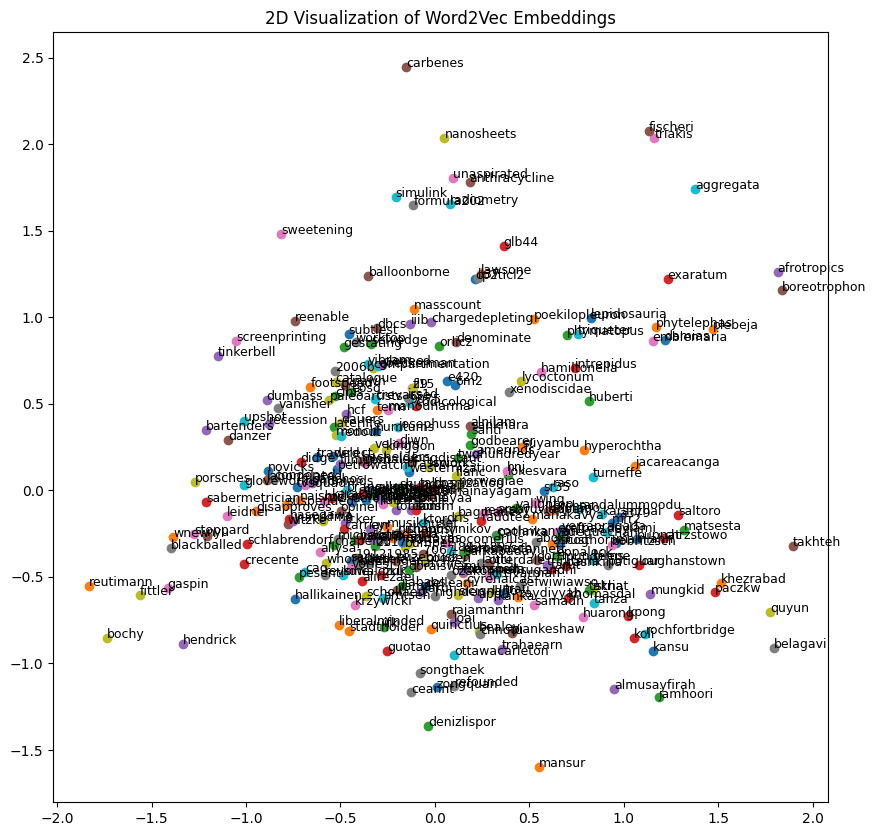

In [ ]:
plt.figure(figsize=(10, 10))

# Plot the words on a 2D scatter plot
for i, word in enumerate(word_sample):
    plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
    plt.annotate(mixed_sub_decrypt(word, substitution_dict), xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=9)

plt.title("2D Visualization of Word2Vec Embeddings")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
<ipython-input-16-a2ace8620446>:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', 10)  # Use a colormap (10 distinct colors)


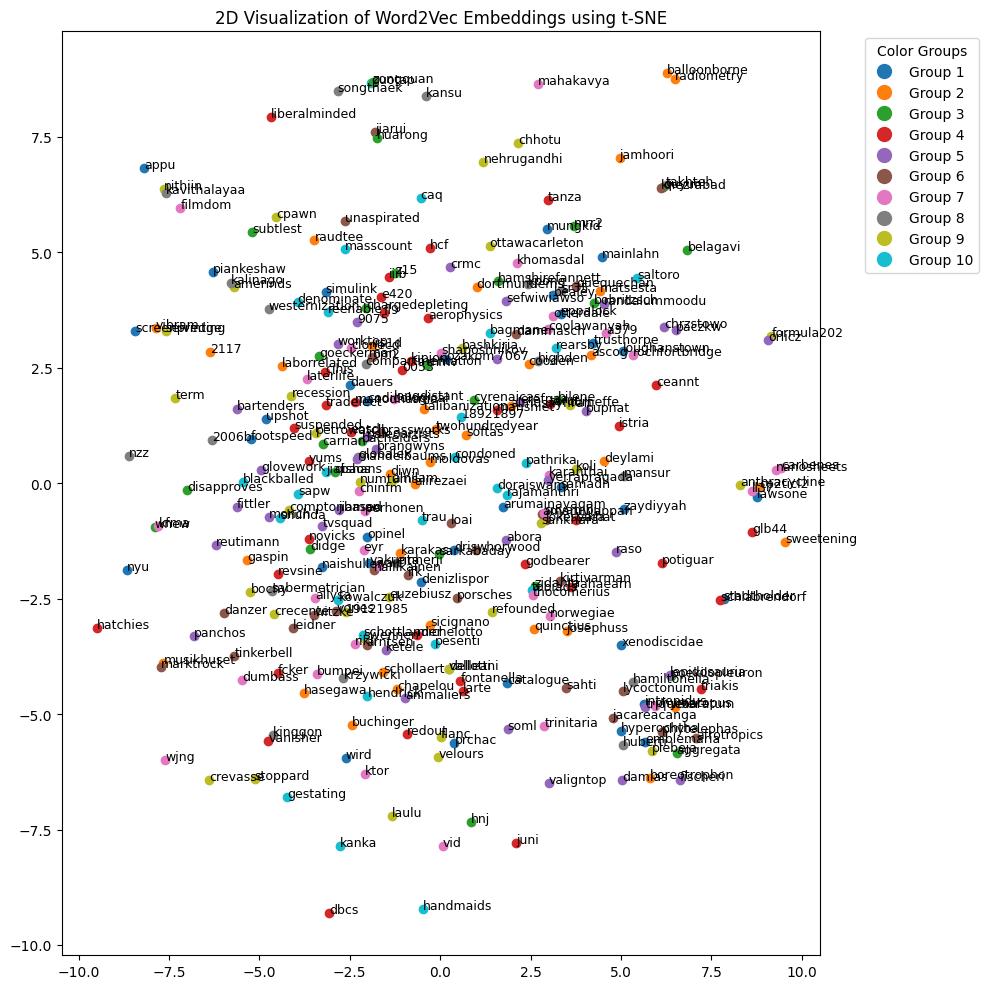

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import random

random.seed(42)
np.random.seed(42)

# Get the list of words in the model's vocabulary
vocab = list(word2vec_model.wv.index_to_key)

# Select a subset of words for visualization (e.g., 300 words)
word_sample = random.sample(vocab, 300)
word_vectors = [word2vec_model.wv[word] for word in word_sample]

# Convert the list of word vectors to a NumPy array
word_vectors = np.array(word_vectors)

# Use t-SNE to reduce word vectors to 2 dimensions
tsne = TSNE(n_components=2, random_state=42, perplexity=40, n_iter=300)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Define a color map for words (random or based on a criterion)
colors = plt.cm.get_cmap('tab10', 10)  # Use a colormap (10 distinct colors)

# Assign a color group (e.g., based on first letter or random groups)
color_labels = {word: colors(random.randint(0, 9)) for word in word_sample}

# Plot the 2D word vectors with different colors
plt.figure(figsize=(10, 10))

for i, word in enumerate(word_sample):
    plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1], color=color_labels[word])
    plt.annotate((mixed_sub_decrypt(word, substitution_dict)), xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=9)

# Adding a legend for color categories (if applicable)
handles = [plt.Line2D([0], [0], marker='o', color=colors(i), label=f'Group {i+1}',
                      linestyle='', markersize=10) for i in range(10)]

plt.legend(handles=handles, title='Color Groups', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("2D Visualization of Word2Vec Embeddings using t-SNE")
plt.tight_layout()  # Adjusts the layout to make room for the legend
plt.show()


In [ ]:
print(mixed_sub_encrypt("sad", substitution_dict))
print(mixed_sub_encrypt("angry", substitution_dict))
print(mixed_sub_encrypt("depression", substitution_dict))
print(mixed_sub_encrypt("polite", substitution_dict))

Lpn_
IEQa[f
^;cHzj5g17
pXfez-


In [ ]:
# Find the top 10 most similar words to a given word (e.g., "king")
similar_words = word2vec_model.wv.most_similar('11p6', topn=10)
print(similar_words)

for i in range(10):
    print(mixed_sub_decrypt(similar_words[i][0], substitution_dict))

[('Q+%&11p6', 0.6958472728729248), ('11p60L', 0.6873562335968018), ('`E#BA"', 0.6782347559928894), ('%aw#%Z3evT', 0.6764348745346069), ('R5:FhJsc', 0.6654918789863586), ('6,Ll6,#R', 0.6648446917533875), ('[DF16,Ll', 0.660977303981781), (',8_M3evT', 0.6556786894798279), ('5gmofGKdr}', 0.6535682678222656), ('Niz617BQ=*A"', 0.6499786972999573)]
thenking
kings
queen
childking
monarch
12161272
11991216
boyking
silamegha
haakonarson


In [ ]:
# Compute similarity between two words (e.g., "king" and "queen")
similarity_score = word2vec_model.wv.similarity('11p6', '`E#BA"')
print(f"Similarity between 'king' and 'queen': {similarity_score}")


Similarity between 'king' and 'queen': 0.6782348155975342


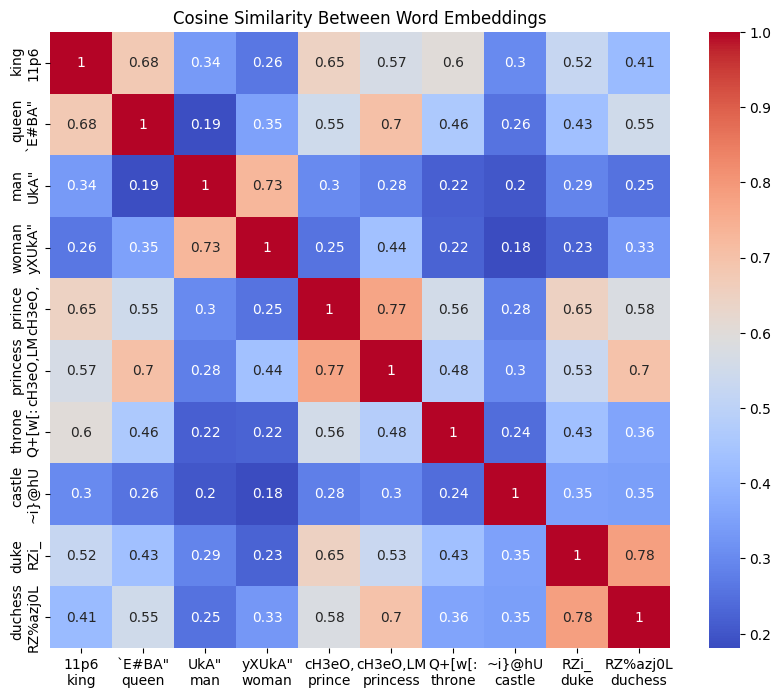

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Define a list of words to compare
#words = ['king', 'queen', 'man', 'woman', 'prince', 'princess', 'throne', 'castle', 'duke', 'duchess']

words = ['11p6', '`E#BA"', 'UkA"', 'yXUkA"', 'cH3eO,', 'cH3eO,LM', 'Q+[w[:', '~i}@hU', 'RZi_', 'RZ%azj0L']

# Extract the word vectors for these words
word_vectors = np.array([word2vec_model.wv[word] for word in words])

# Compute cosine similarity between each pair of words
similarity_matrix = np.zeros((len(words), len(words)))
for i, word1 in enumerate(words):
    for j, word2 in enumerate(words):
        similarity_matrix[i][j] = word2vec_model.wv.similarity(word1, word2)

# Create a heatmap
plt.figure(figsize=(10, 8))
wordsy = [f"{(mixed_sub_decrypt(word, substitution_dict))}\n{word}" for word in words]
wordsx = [f"{word}\n{(mixed_sub_decrypt(word, substitution_dict))}" for word in words]
sns.heatmap(similarity_matrix, xticklabels=wordsx, yticklabels=wordsy, annot=True, cmap='coolwarm')
plt.title('Cosine Similarity Between Word Embeddings')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


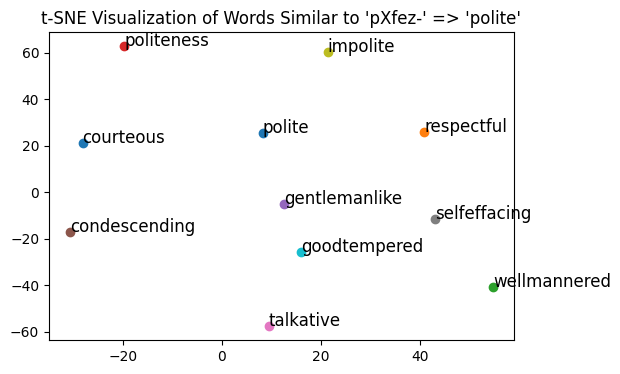

In [ ]:
# Get the most similar words for a given word
target_word = 'pXfez-'
similar_words = [word for word, _ in word2vec_model.wv.most_similar(target_word, topn=10)]
similar_words.append(target_word)  # Add the target word itself to the list

# Extract word vectors for these words
similar_vectors = np.array([word2vec_model.wv[word] for word in similar_words])

# Use t-SNE to reduce word vectors to 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=5, n_iter=300)
word_vectors_2d = tsne.fit_transform(similar_vectors)

# Plot the t-SNE for the similar words
plt.figure(figsize=(6, 4))
for i, word in enumerate(similar_words):
    plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
    plt.annotate(mixed_sub_decrypt(word, substitution_dict), xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=12)

plt.title(f"t-SNE Visualization of Words Similar to '{target_word}' => '{mixed_sub_decrypt(target_word, substitution_dict)}'")
plt.show()


In [ ]:
# Demonstrate an analogy: "king" is to "queen" as "man" is to "woman"
result = word2vec_model.wv.most_similar(positive=['11p6', 'yXUkA"'], negative=['UkA"'], topn=1)
print(f"'king' is to 'queen' as 'man' is to: {result[0][0]}")


'king' is to 'queen' as 'man' is to: `E#BA"


In [ ]:
# Extract word vectors and words from the model
word_vectors = word2vec_model.wv
vocab = list(word_vectors.key_to_index.keys())
vectors = np.array([word_vectors[word] for word in vocab])


In [ ]:
# # Save the vectors to a file
# np.savetxt('vectors.tsv', vectors, delimiter='\t')

# # Save the metadata (word labels) to a file
# with open('metadata.tsv', 'w') as f:
#     for word in vocab:
#         f.write(f"{word}\n")


In [ ]:
!wget https://raw.githubusercontent.com/nicholas-leonard/word2vec/master/questions-words.txt


--2024-10-12 18:25:16--  https://raw.githubusercontent.com/nicholas-leonard/word2vec/master/questions-words.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.07s   

2024-10-12 18:25:17 (8.39 MB/s) - ‘questions-words.txt’ saved [603955/603955]



In [ ]:


# Evaluate on Google Analogies Dataset
analogies_file = 'questions-words.txt' # Load the file using gensim.downloader to ensure the correct format.



# prompt: open the analogy file and encrypt each sentence then write in a new text file

def encrypt_sentences_from_file(input_file, output_file, substitution_dict):
  """Encrypts sentences from an input file and writes them to an output file.

  Args:
    input_file: Path to the input text file.
    output_file: Path to the output text file.
    substitution_dict: The substitution dictionary for encryption.
  """
  with open(input_file, 'r') as f_in, open(output_file, 'w') as f_out:
    for line in f_in:
      encrypted_line = ' '.join([mixed_sub_encrypt(clean_sentence(word), substitution_dict) for word in line.split()])
      f_out.write(encrypted_line + '\n')

# Example usage:
input_file = analogies_file  # Replace with the path to your analogy file
output_file = 'encrypted_analogy.txt' # Replace with the desired output file path

encrypt_sentences_from_file(input_file, output_file, substitution_dict)

In [ ]:



print(f"Evaluating on Google Analogies Dataset: {analogies_file}")
results = word2vec_model.wv.evaluate_word_analogies('/content/encrypted_analogy.txt')

# Print overall accuracy
overall_accuracy = results[0]
print(f'Overall accuracy: {overall_accuracy * 100:.2f}%')

# Print performance on semantic and syntactic categories
# Accessing the result sections and checking for keys in a more robust way.
section_accuracies = []
for section_data in results[1]:
    section = section_data.get('section', 'Unknown') # Get the 'section' value, defaulting to 'Unknown' if it doesn't exist.
    correct = section_data.get('correct', 0) # Get the 'correct' value, defaulting to 0 if it doesn't exist.
    total = section_data.get('total', 0) # Get the 'total' value, defaulting to 0 if it doesn't exist.
    accuracy = correct / total if total > 0 else 0 # Calculate accuracy, handling the case where 'total' is 0.
    section_accuracies.append((section, accuracy)) # Add the section and accuracy to the list.

for section, accuracy in section_accuracies:
    print(f'{section}: {accuracy * 100:.2f}%')

Evaluating on Google Analogies Dataset: questions-words.txt
Overall accuracy: 69.96%
capital-common-countries: 0.00%
Total accuracy: 0.00%


In [ ]:
# Example: king - man + woman = ?
result = word2vec_model.wv.most_similar(positive=['king', 'woman'], negative=['man'])
print(result)

# Calculate cosine similarity between two words
similarity = word2vec_model.wv.similarity('king', 'queen')
print(f'Similarity between king and queen: {similarity:.2f}')


In [ ]:
print(mixed_sub_encrypt("king", substitution_dict))
print(mixed_sub_encrypt("cat", substitution_dict))
print(mixed_sub_encrypt("dog", substitution_dict))
print(mixed_sub_encrypt("queen", substitution_dict))

11p6
~i]O
dIvT
`E#BA"


In [ ]:
# Semantic analogy
print(word2vec_model.wv.evaluate_word_analogies("/content/encrypted_analogy.txt"))
# print(result)
# You can also test specific analogies
print(word2vec_model.wv.most_similar(positive=['yXUkA"', '11p6'], negative=['UkA"']))

In [ ]:
# Print overall accuracy
overall_accuracy = result[0]
print(f'Overall accuracy: {overall_accuracy * 100:.2f}%')

# Print performance on semantic and syntactic categories
# Accessing the result sections and checking for keys in a more robust way.
section_accuracies = []
for section_data in result[1]:
    section = section_data.get('section', 'Unknown') # Get the 'section' value, defaulting to 'Unknown' if it doesn't exist.
    correct = section_data.get('correct', 0) # Get the 'correct' value, defaulting to 0 if it doesn't exist.
    total = section_data.get('total', 0) # Get the 'total' value, defaulting to 0 if it doesn't exist.
    accuracy = correct / total if total > 0 else 0 # Calculate accuracy, handling the case where 'total' is 0.
    section_accuracies.append((section, accuracy)) # Add the section and accuracy to the list.

for section, accuracy in section_accuracies:
    print(f'{section}: {accuracy * 100:.2f}%')

In [ ]:
print(word2vec_model.wv.similarity('dIvT', '~i]O'))
print(word2vec_model.wv.similarity('11p6', '`E#BA"'))

0.7682251
0.6782348


In [ ]:
categories = [
    ['dog', 'cat', 'horse'],
    ['apple', 'banana', 'orange'],
    ['car', 'truck', 'motorcycle']
]

for category in categories:
    encrypted_category = [mixed_sub_encrypt(word, substitution_dict) for word in category]
    intruder = word2vec_model.wv.doesnt_match(encrypted_category)
    decrypted_intruder = mixed_sub_decrypt(intruder, substitution_dict)  # Decrypt the result
    print(decrypted_intruder)

horse
orange
motorcycle


In [ ]:
def detect_intrusion(words, substitution_dict):
    # Encrypt the words
    encrypted_words = [mixed_sub_encrypt(word, substitution_dict) for word in words]

    similarities = [
        (word, sum(word2vec_model.wv.similarity(word, other_word)
                   for other_word in encrypted_words if word != other_word))
        for word in encrypted_words
    ]

    # Decrypt the intruder word before returning
    intruder_encrypted = min(similarities, key=lambda x: x[1])[0]
    intruder_decrypted = mixed_sub_decrypt(intruder_encrypted, substitution_dict)
    return intruder_decrypted

# Example usage with encryption and decryption
words1 = ['breakfast', 'cereal', 'dinner', 'lunch']
words2 = ['dog', 'cat', 'fish', 'telephone']

print(detect_intrusion(words1, substitution_dict))  # Output: breakfast
print(detect_intrusion(words2, substitution_dict))  # Output: telephone

cereal
telephone


## Correlation Calculation

In [ ]:
from scipy.stats import spearmanr

def evaluate_correlation(filename):
    human_scores = []
    model_scores = []

    with open(filename, 'r') as f:
        for line in f:
            word1, word2, score = line.strip().split('\t')
            word1 = mixed_sub_encrypt(word1, substitution_dict)
            word2 = mixed_sub_encrypt(word2, substitution_dict)
            if word1 in word2vec_model.wv and word2 in word2vec_model.wv:
                human_scores.append(float(score))
                model_scores.append(word2vec_model.wv.similarity(word1, word2))

    return spearmanr(human_scores, model_scores)

print(evaluate_correlation('/content/wordsim353.txt'))

SignificanceResult(statistic=0.6987906428564991, pvalue=2.2109651843706703e-50)


In [ ]:
import numpy as np
from scipy.stats import spearmanr
from gensim.models import Word2Vec

def load_simlex999(file_path):
    word_pairs = []
    human_scores = []
    with open(file_path, 'r', encoding='utf-8') as f:
        # Skip header
        next(f)
        for line in f:
            parts = line.strip().split('\t')
            word1, word2, _, score = parts[:4]

            word_pairs.append((word1, word2))
            #print(score)
            human_scores.append(float(score))
        #print(word_pairs)

    return word_pairs, human_scores

def evaluate_word2vec_on_simlex999(model_path, simlex_path):
    # Load the Word2Vec model
    word2vec_model = model_path

    # Load SimLex-999 dataset
    word_pairs, human_scores = load_simlex999(simlex_path)

    # Compute model scores
    model_scores = []
    oov_words = set()
    for word1, word2 in word_pairs:
        word1 = mixed_sub_encrypt(word1, substitution_dict)
        word2 = mixed_sub_encrypt(word2, substitution_dict)
        if word1 in word2vec_model.wv and word2 in word2vec_model.wv:
            similarity = word2vec_model.wv.similarity(word1, word2)
            model_scores.append(similarity)
        else:
            if word1 not in word2vec_model.wv:
                oov_words.add(word1)
            if word2 not in word2vec_model.wv:
                oov_words.add(word2)
            model_scores.append(None)

    # Remove pairs with OOV words
    filtered_human_scores = [score for score, model_score in zip(human_scores, model_scores) if model_score is not None]
    filtered_model_scores = [score for score in model_scores if score is not None]

    # Compute Spearman correlation
    correlation, p_value = spearmanr(filtered_human_scores, filtered_model_scores)

    # Print results
    print(f"Spearman correlation: {correlation:.4f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Number of evaluated word pairs: {len(filtered_model_scores)}")
    print(f"Number of OOV words: {len(oov_words)}")
    print("Sample of OOV words:", list(oov_words)[:10])

    return correlation, p_value, oov_words

# Example usage
# model_path = '/content/drive/MyDrive/Thesis [G-suite]/Defense/Embedding Models/Word2Vec_SkipGram_New/word2vec_model.bin'
simlex_path = '/content/normalized_simlex999.txt'
correlation, p_value, oov_words = evaluate_word2vec_on_simlex999(word2vec_model, simlex_path)

Spearman correlation: 0.3829
P-value: 0.0000
Number of evaluated word pairs: 999
Number of OOV words: 0
Sample of OOV words: []


In [ ]:
from sklearn.cluster import KMeans
import numpy as np

words = list(word2vec_model.wv.key_to_index.keys())[:1000]  # Take first 1000 words
word_vectors = [word2vec_model.wv[word] for word in words]

kmeans = KMeans(n_clusters=10)
kmeans.fit(word_vectors)

for i in range(10):
    cluster_words = [mixed_sub_decrypt(words[j],substitution_dict) for j in range(len(words)) if kmeans.labels_[j] == i]
    print(f"Cluster {i}: {', '.join(cluster_words[:10])}")

Cluster 0: city, area, county, district, house, located, town, station, church, river
Cluster 1: 2010, 2011, 2012, 2014, 2013, 2008, 2009, 2015, 2007, 2006
Cluster 2: south, north, west, east, central, side, island, region, western, northern
Cluster 3: school, national, university, state, war, company, government, international, public, member
Cluster 4: was, he, his, first, after, her, she, who, when, time
Cluster 5: season, team, against, played, won, league, game, club, football, games
Cluster 6: made, became, born, released, began, named, held, took, served, did
Cluster 7: the, of, in, and, a, to, is, for, on, as
Cluster 8: world, united, states, american, york, british, french, english, u, country
Cluster 9: 1, 2, 3, 5, march, 000, 4, september, june, january


In [ ]:
import numpy as np
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import plotly.graph_objs as go
import plotly.io as pio

def visualize_word_clusters(model_path, n_clusters=10, n_words=1000):
    # Load the Word2Vec model
    word2vec_model = model_path

    # Get the most common words
    # Sort words based on their count in the vocabulary
    words = [word for word, vocab in sorted(word2vec_model.wv.key_to_index.items(),
                                            key=lambda item: word2vec_model.wv.get_vecattr(item[0], "count"), reverse=True)[:n_words]]
    word_vectors = [word2vec_model.wv[word] for word in words]
    words = words[:1000]
    words = [mixed_sub_decrypt(word, substitution_dict) for word in words]
    # Convert word_vectors to a NumPy array
    word_vectors = np.array(word_vectors[:1000]) # This line converts the list to a NumPy array

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(word_vectors)

    # Perform t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    coordinates = tsne.fit_transform(word_vectors)

    # Create a scatter plot for each cluster
    traces = []
    for i in range(n_clusters):
        cluster_words = [word for word, label in zip(words, kmeans.labels_) if label == i]
        cluster_coords = coordinates[[list(words).index(word) for word in cluster_words]]

        trace = go.Scatter(
            x=cluster_coords[:, 0],
            y=cluster_coords[:, 1],
            mode='markers+text',
            name=f'Cluster {i}',
            text=cluster_words,
            textposition="top center",
            hoverinfo='text',
            marker=dict(size=10),
            textfont=dict(size=10)
        )
        traces.append(trace)

    # Create the layout
    layout = go.Layout(
        title='Word Clusters Visualization',
        hovermode='closest',
        xaxis=dict(title='t-SNE dimension 1', showticklabels=False),
        yaxis=dict(title='t-SNE dimension 2', showticklabels=False),
        showlegend=True
    )

    # Create the figure and show it
    fig = go.Figure(data=traces, layout=layout)
    pio.show(fig)

In [ ]:
visualize_word_clusters(word2vec_model)

In [ ]:
!pip install tensorboardX


In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from tensorboardX import SummaryWriter
# import tensorflow as tf  # No need for TensorFlow here

# 1. Extract embeddings
vocab = list(word2vec_model.wv.key_to_index.keys())
embeddings = word2vec_model.wv[vocab]

# 2. Perform PCA
pca = PCA(n_components=256)
embeddings_3d = pca.fit_transform(embeddings)

# 3. Prepare data for TensorBoard Projector
# embeddings_tensor = tf.Variable(embeddings_3d) # Removed - No need to convert to TensorFlow Variable
metadata = vocab

# 4. Write data to files
log_dir = 'logs/word2vec_evaluation'
writer = SummaryWriter(log_dir)

# Use embeddings_3d (NumPy array) directly
writer.add_embedding(embeddings_3d,
                     metadata=metadata,
                     tag='word2vec_embeddings')

writer.close()

print(f"Data has been written to {log_dir}")
print("To visualize in TensorBoard, run the following command in your terminal:")
print(f"tensorboard --logdir={log_dir}")

Data has been written to logs/word2vec_evaluation
To visualize in TensorBoard, run the following command in your terminal:
tensorboard --logdir=logs/word2vec_evaluation


In [ ]:
%reload_ext tensorboard
%tensorboard --logdir=logs/word2vec_evaluation

In [ ]:

# Print 20 words from the vocabulary with their sequence numbers
for i, word in enumerate(word2vec_model.wv.index_to_key[:20]):
    print(f"{i}: {word}")


In [ ]:
import os
print(os.getcwd())  # This will print the current working directory
print(os.listdir()) # This will list all files in the current directory

In [ ]:
import os
%ls

In [ ]:
# from google.colab import files
# files.download('fasttext_model.bin.syn1neg.npy')

In [ ]:
# from google.colab import files
# files.download('fasttext_model.bin.wv.vectors_ngrams.npy')

In [ ]:
# from google.colab import files
# files.download('fasttext_model.bin.wv.vectors_vocab.npy')

In [ ]:
neighbors = model.wv.most_similar('emotion')
print("Nearest neighbors to 'emotion':", neighbors)

In [ ]:

import io
import numpy as np

# Generate TSV files for vectors and metadata
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

# Populate the embedding matrix and save vectors/metadata
for word in word2vec_model.wv.index_to_key:
    vector = word2vec_model.wv[word]
    out_v.write('\t'.join([str(x) for x in vector]) + "\n")
    out_m.write(word + "\n")

out_v.close()
out_m.close()



In [ ]:
from gensim.models import Word2Vec

# Specify the full path to your model file
word2vec_model = 'word2vec_model.bin'  # Replace '/content/' if your file is in a different directory

try:
    model = Word2Vec.load(model_path)
    print("Model loaded successfully!")

    # Example usage (replace 'example' with a word in your vocabulary)
    word_vector = model.wv['example']
    print("Word Vector:", word_vector)

except FileNotFoundError:
    print(f"Error: File not found at {model_path}")
except Exception as e:
    print(f"An error occurred while loading the model: {e}")

Model loaded successfully!
An error occurred while loading the model: "Key 'example' not present"


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Define max_sequence_length
max_sequence_length = 10  # This should match the output_sequence_length from TextVectorization

embedding_dim = 200  # Embedding dimension used in FastText
vocab_size = len(word2vec_model.wv.index_to_key) + 1  # Vocab size based on Word2Vec model

# Initialize the embedding matrix with zeros
embedding_matrix = np.zeros((vocab_size, embedding_dim))

# Populate the embedding matrix with Word2Vec embeddings
for i, word in enumerate(word2vec_model.wv.index_to_key):
    embedding_vector = word2vec_model.wv[word]
    if embedding_vector is not None:
        embedding_matrix[i + 1] = embedding_vector

# Define the LSTM model
model = Sequential()

# The Embedding Layer initialized with the pretrained embeddings
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    input_length=max_sequence_length,
                    weights=[embedding_matrix],
                    trainable=False))  # Set trainable to False to keep embeddings fixed

# Add LSTM and Dense layers
model.add(LSTM(128))  # Ensure LSTM is properly added with 128 units
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a specific learning rate
learning_rate = 0.00001
optimizer = Adam(learning_rate=learning_rate)
model.compile(loss='BinaryCrossentropy', optimizer=optimizer, metrics=['accuracy'])

# Print the model summary
model.summary()

# # Training the Model with GPU
# with tf.device('/GPU:1'):
#     history = model.fit(X_train_padded, y_train, epochs=10, batch_size=64, validation_split=0.1, validation_steps=30, verbose=1)

# # Saving the model to a file
# model.save('LSTM.h5')


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Define max_sequence_length
max_sequence_length = 10  # This should match the output_sequence_length from TextVectorization

# Load the embeddings and vocabulary
embedding_dim = 128  # Same as the embedding_dim used in Word2Vec training
vocab_size = 16384  # Same as the vocab_size used in Word2Vec training

# Create a dictionary to map words to their embeddings
embedding_index = {}
with open('vectors.tsv', encoding='utf-8') as f_vectors, open('metadata.tsv', encoding='utf-8') as f_metadata:
    for word, vector in zip(f_metadata, f_vectors):
        word = word.strip()
        vector = np.array(vector.split(), dtype=np.float32)
        embedding_index[word] = vector

# Calculate the mean embedding vector
all_vectors = np.array(list(embedding_index.values()))
mean_vector = np.mean(all_vectors, axis=0)

# Initialize the embedding matrix with zeros
embedding_matrix = np.zeros((vocab_size, embedding_dim))

# Populate the embedding matrix with the vectors from the pretrained embeddings
for i, word in enumerate(vectorize_layer.get_vocabulary()):
    if i == 0:
        continue  # Skip padding token
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
    else:
        embedding_matrix[i] = mean_vector  # Use the mean vector for OOV tokens

# Define the LSTM model
model = Sequential()

# The Embedding Layer initialized with the pretrained embeddings
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    input_length=max_sequence_length,
                    weights=[embedding_matrix],
                    trainable=False))  # Set trainable to False to keep embeddings fixed

# Add LSTM and Dense layers
model.add(LSTM(128))  # Ensure LSTM is properly added with 128 units
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a specific learning rate
learning_rate = 0.00001
optimizer = Adam(learning_rate=learning_rate)
model.compile(loss='BinaryCrossentropy', optimizer=optimizer, metrics=['accuracy'])

# Print the model summary
model.summary()

# # Training the Model with GPU
# with tf.device('/GPU:1'):
#     history = model.fit(X_train_padded, y_train, epochs=10, batch_size=64, validation_split=0.1, validation_steps=30, verbose=1)

# # Saving the model to a file
# model.save('LSTM.h5')
